<a href="https://colab.research.google.com/github/orangNLP/Modules_practice/blob/main/tensorflow_keras_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Preprocessing**

In [ ]:
#Tokenizer -> Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
train_text = 'I am ever feeling nostalgic about the time when we get along together almost everyday'

#단어 집합 생성
tokenizer.fit_on_texts([train_text])
print(tokenizer.word_index)
'''
문자 리스트 데이터를 입력받아 word_index의 형태로 정렬함
구두점, 대문자 등의 요소는 제거
'''

#정수 인코딩
texts_for_encoding = ['I feel nostalgic',
                      'We get along together',
                      'I feel madness'
                      'The time when we loved each other']
sequence = tokenizer.texts_to_sequences(texts_for_encoding)
print(sequence)
'''
문자 리스트 데이터를 입력받아 word_index에 토큰화 되어있는 단어들의 정수값으로 변환해줌
단, 미리 토큰화해두지 않은 단어가 출현할 경우 값이 누락됨
'''
print()

{'i': 1, 'am': 2, 'ever': 3, 'feeling': 4, 'nostalgic': 5, 'about': 6, 'the': 7, 'time': 8, 'when': 9, 'we': 10, 'get': 11, 'along': 12, 'together': 13, 'almost': 14, 'everyday': 15}
[[1, 5], [10, 11, 12, 13], [1, 8, 9, 10]]



In [ ]:
#pad_sequences -> tool for padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequence = pad_sequences(sequence,maxlen=4,padding='pre')
print(sequence)
'''
첫번째 인자 = 패딩을 진행할 데이터
maxlen = 모든 데이터에 대해서 정규화 할 길이
padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

만약 패딩 할 데이터가 maxlen보다 길다면 초과한 만큼 앞부분의 값이 짤림
'''
print()

[[ 0  0  1  5]
 [10 11 12 13]
 [ 1  8  9 10]]



In [ ]:
#Word Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential

tokenizer_i = Tokenizer()
train_text = ['hope to see you soon',
              'nice to see you soon',
              'hope you come back']
tokenizer_i.fit_on_texts(train_text)
tokened_text = list(tokenizer_i.word_index.keys())
encoded_text = tokenizer_i.texts_to_sequences(train_text)
max_len = 5
padded_text = pad_sequences(encoded_text,maxlen=max_len,padding='pre')

print(tokened_text, '\n', padded_text)
print(tokenizer_i.word_index)
vocab_size = len(tokenizer_i.word_index) + 1
embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
'''
첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수. 보통 len(word_index) +1
두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
input_length = 입력 시퀀스의 길이(패딩 max_len)
'''
print()

['you', 'hope', 'to', 'see', 'soon', 'nice', 'come', 'back'] 
 [[2 3 4 1 5]
 [6 3 4 1 5]
 [0 2 1 7 8]]
{'you': 1, 'hope': 2, 'to': 3, 'see': 4, 'soon': 5, 'nice': 6, 'come': 7, 'back': 8}


#**Sequential API Modeling**

In [ ]:
#modeling
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
max_len = 5
vocab_size = len(tokenizer_i.word_index) + 1
embedding_dim = 4

model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))

#Dense
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

'''
첫번째 인자 = 출력 뉴런의 수.
input_dim = 입력 뉴런의 수. (입력의 차원)
activation = 활성화 함수.
- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력. y=x
- sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.0~1사이의 값을 지니는 비선형함수
- softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수. 결과 값을 0~1사이로 정규화. 결과를 확률로 해석할 수 있게 해줌. 모든 확률의 합은 1
- relu : 은닉층에 주로 사용되는 활성화 함수. f(x) = 0 (if x < 0), f(x) = x (if x > 0)
'''
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 5, 4)              36        
                                                                 
 dense (Dense)               (None, 5, 8)              40        
                                                                 
 dense_1 (Dense)             (None, 5, 1)              9         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
'''
optimizer = 훈련 과정을 설정하는 옵티마이저를 설정
loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정
metrics = 훈련을 모니터링하기 위한 지표를 선택
'''
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))
'''
첫번째 인자 = 훈련 데이터
두번째 인자 = 지도 학습에서의 레이블 데이터
epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의
batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재

validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용합
일반적으로 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도나 오차를 함께 출력하는데,이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않음.
검증 데이터의 오차(loss)가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호.

validation_split = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 validation_data 대신 사용할 수 있음.
검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용함.

verbose = 학습 중 출력되는 문구를 설정
- 0 : 출력 X
- 1 : 훈련의 진행도를 보여주는 진행 막대 출력
- 2 : 미니 배치마다 손실 정보를 출력
'''

#evaluate
model.evaluate(X_test, y_test, batch_size=32)
'''
테스트 데이터를 통해 모델의 정확도 평가

첫번째 인자 = 테스트 데이터
두번째 인자 = 지도 학습에서의 레이블 테스트 데이터
batch_size = 배치 크기
'''

#predict
model.predict(X_input, batch_size=32)
'''
임의의 입력에 대한 모델의 출력값을 확인
첫번째 인자 = 예측하고자 하는 데이터.
batch_size = 배치 크기.
'''

In [ ]:
#save
model.save("file_name.h5")
#load
from tensorflow.keras.models import load_model
model.load("file_name.h5")

#**Functional API Modeling**

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(10,)) #functional API에서는 input layer를 정의해주어야 함
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output)

Epoch 1/300


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 270ms/step - loss: 4097.6987 - mse: 4097.6987
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 505.2885 - mse: 505.2885
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 63.2678 - mse: 63.2678
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 8.8791 - mse: 8.8791
Epoch 5/300
1/1 [==============================] - 0s 17ms/step - loss: 2.1856 - mse: 2.1856
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 1.3607 - mse: 1.3607
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2579 - mse: 1.2579
Epoch 8/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2439 - mse: 1.2439
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 1.2409 - mse: 1.2409
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 1.2392 - mse: 1.2392
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss: 1

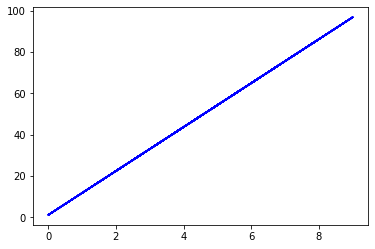

In [ ]:
#Linear Regression
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs=inputs, outputs=output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300, verbose=1)

predict_X = np.random.choice(10,100)
y = linear_model.predict(predict_X)

plt.plot(predict_X, y, 'b--')
plt.show()

In [ ]:
#다중 입력 모델
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

#**Subclassing API Modeling**

In [ ]:
import tensorflow as tf
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred